In [24]:
from sklearn import ensemble, model_selection, datasets, metrics
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [25]:
raw_data = pd.read_csv('Bioshpehere.csv', header=0, sep=',')

In [26]:
raw_data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [27]:
bioresponce_target = raw_data.Activity.values
print('How many classes')
print('bioresponce class 1: {:.2f}\nbioresponce class 0: {:.2f}'.format(sum(bioresponce_target) / float(len(bioresponce_target)),
                                                                           1.0 - sum(bioresponce_target) / float(len(bioresponce_target))))

How many classes
bioresponce class 1: 0.54
bioresponce class 0: 0.46


In [28]:
bioresponce_data = raw_data.iloc[:,1:]

### Модель RandomForestClassifier
##### Кривые обучения для деревьев малой глубины

#### Определим сколько данных нужно для достижения максимального качества

In [29]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators=50, max_depth=2, random_state=1)

In [30]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_low_depth,
                                                                        bioresponce_data, bioresponce_target,
                                                                        train_sizes=np.arange(.1, 1., 0.05),
                                                                        cv=3, scoring='accuracy')

In [31]:
print(train_sizes)
print(train_scores.mean(axis=1))
print(test_scores.mean(axis=1))

[ 250  375  500  625  750  875 1000 1125 1250 1375 1500 1625 1750 1875
 2000 2125 2250 2375]
[0.74933333 0.72711111 0.72933333 0.72533333 0.71333333 0.69904762
 0.69166667 0.69777778 0.68453333 0.68048485 0.68622222 0.68553846
 0.69104762 0.68711111 0.68283333 0.68690196 0.69022222 0.68322807]
[0.62356685 0.63476003 0.6382284  0.64649145 0.64195598 0.62942947
 0.64089656 0.65316621 0.65369955 0.65369848 0.65422712 0.66222222
 0.66248974 0.65928995 0.66248889 0.66222073 0.66728527 0.66301881]


(0.0, 1.05)

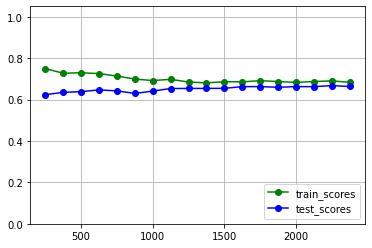

In [36]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis=1), 'g-', marker='o', label='train_scores')
plt.plot(train_sizes, test_scores.mean(axis=1), 'b-', marker='o', label='test_scores')
plt.legend(loc='lower right')
plt.ylim(0, 1.05)


### Попробуем увеличить глубину деревьев

In [42]:
rf_classifier_high_depth = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [43]:
train_sizes, train_scores, test_scores = model_selection.learning_curve(rf_classifier_high_depth,
                                                                        bioresponce_data, bioresponce_target,
                                                                        train_sizes=np.arange(.1, 1, .2),
                                                                        cv=3, scoring='accuracy')

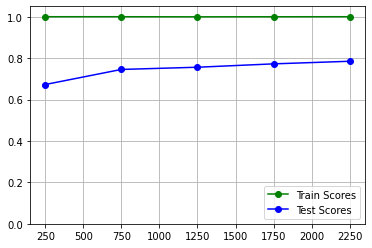

In [44]:
plt.grid(True)
plt.plot(train_sizes, train_scores.mean(axis=1), 'g-', marker='o', label='Train Scores')
plt.plot(train_sizes, test_scores.mean(axis=1), 'b-', marker='o', label='Test Scores')
plt.ylim(0,1.05)
plt.legend(loc='lower right')

In [ ]:
datasets.